### Instalando as dependências do YOLOX

In [ ]:
# Desinstalando versão do cuda para instalar outra versão
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
# Instalando CUDA 11.0
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!sudo apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get -y install cuda-11-0

--2022-01-26 14:04:24--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2022-01-26 14:04:24 (8.15 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2022-01-26 14:04:24--  http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:80... connected.
HTTP request sent, awaiting response... 301 Mov

In [ ]:
!git clone https://github.com/roboflow-ai/YOLOX.git
%cd YOLOX
!pip3 install -U pip && pip3 install -r requirements.txt
!pip3 install -v -e .  
!pip uninstall -y torch torchvision torchaudio
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Cloning into 'YOLOX'...
remote: Enumerating objects: 786, done.
remote: Total 786 (delta 0), reused 0 (delta 0), pack-reused 786
Receiving objects: 100% (786/786), 5.78 MiB | 19.85 MiB/s, done.
Resolving deltas: 100% (416/416), done.
/content/YOLOX
     |████████████████████████████████| 1.7 MB 5.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 57 kB 2.6 MB/s             
     |████████████████████████████████| 108 kB 10.9 MB/s            
     |████████████████████████████████| 14.5 MB 23.8 MB/s            
     |████████████████████████████████| 4.5 MB 38.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 466 kB 38.9 MB/s            
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.5-py3-none-any.whl size=12878 sha256=54a5885665ba5d96071103fc33738c292231127df4937c9d15225502a0aac9

## Instalando Apex Nvidia

In [ ]:
%cd /content/
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/content
Cloning into 'apex'...
remote: Enumerating objects: 8879, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 8879 (delta 64), reused 77 (delta 46), pack-reused 8767
Receiving objects: 100% (8879/8879), 14.52 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (6045/6045), done.
/content/apex
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:245: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Processing /content/apex
  Running command python setup.py egg_info


  torch.__version__  = 1.7.1+cu110


  running egg_info
  creating /tmp/pip-pip-egg-info-y3wt5drv/apex.egg-info
  writing /tmp/pip-pip-egg-info-y3wt5drv/apex.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-y3wt5drv/apex.egg-inf

## Instalando PyCocoTools

In [ ]:
!pip3 install cython; pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-z_svcp5f
  Running command git clone --filter=blob:none -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-z_svcp5f
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263949 sha256=a9ba59820b0c13f9148f02eb180ad8513f88f5596af49e1a946ddd3e4793fcdf
  Stored in directory: /tmp/pip-ephem-wheel-cache-vv250d8b/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4


# Preparando os dados


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%mkdir "/content/YOLOX/YOLOX_outputs"
%mkdir "/content/YOLOX/YOLOX_outputs/yolox_voc_s"

In [ ]:
# Copiando o zip do meu drive para a VM
%cd /content/
!cp /content/gdrive/MyDrive/PUC-TCC/projeto/face_mask.zip .

/content


In [ ]:
!unzip face_mask.zip
!rm face_mask.zip

Archive:  face_mask.zip
   creating: face_mask/
 extracting: face_mask/maksssksksss0.png  
  inflating: face_mask/maksssksksss0.xml  
 extracting: face_mask/maksssksksss1.png  
  inflating: face_mask/maksssksksss1.xml  
 extracting: face_mask/maksssksksss10.png  
  inflating: face_mask/maksssksksss10.xml  
 extracting: face_mask/maksssksksss100.png  
  inflating: face_mask/maksssksksss100.xml  
 extracting: face_mask/maksssksksss101.png  
  inflating: face_mask/maksssksksss101.xml  
 extracting: face_mask/maksssksksss102.png  
  inflating: face_mask/maksssksksss102.xml  
 extracting: face_mask/maksssksksss103.png  
  inflating: face_mask/maksssksksss103.xml  
 extracting: face_mask/maksssksksss104.png  
  inflating: face_mask/maksssksksss104.xml  
 extracting: face_mask/maksssksksss105.png  
  inflating: face_mask/maksssksksss105.xml  
 extracting: face_mask/maksssksksss106.png  
  inflating: face_mask/maksssksksss106.xml  
 extracting: face_mask/maksssksksss107.png  
  inflating: face

In [ ]:
%cd YOLOX/

In [ ]:
!ln -s /content/face_mask ./datasets/VOCdevkit

In [ ]:
# Atualizar voc_txt para PNG and voc.py (Ou mudar imagens para formato jpeg que o treinamento pode ser mais rapido)
%mkdir "/content/YOLOX/datasets/VOCdevkit/VOC2007"
!python3 voc_txt.py "/content/YOLOX/datasets/VOCdevkit/"
%mkdir "/content/YOLOX/datasets/VOCdevkit/VOC2012"
!cp -r "/content/YOLOX/datasets/VOCdevkit/VOC2007/." "/content/YOLOX/datasets/VOCdevkit/VOC2012"

## Mudar as classes de acordo com o seu dataset

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/YOLOX/yolox/data/datasets/voc_classes.py

VOC_CLASSES = (
  "with_mask",
  "without_mask",
  "mask_weared_incorrect"
)

Setar a variável `NUM_CLASSES` de acordo com a quantidade de classes no seu dataset

In [ ]:
NUM_CLASSES = 3
!sed -i -e 's/self.num_classes = 20/self.num_classes = {NUM_CLASSES}/g' "/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py"

# Download pesos iniciais

In [ ]:
%cd /content/
!wget https://github.com/Megvii-BaseDetection/storage/releases/download/0.0.1/yolox_s.pth
%cd /content/YOLOX/

# Treinando o modelo

In [ ]:
!python tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 16 --fp16 -o -c /content/yolox_s.pth

# Avaliação do modelo treinado


In [ ]:
MODEL_PATH = "/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar"
!python3 tools/eval.py -n  yolox-s -c {MODEL_PATH} -b 64 -d 1 --conf 0.001 -f exps/example/yolox_voc/yolox_voc_s.py

2021-10-20 14:05:53 | INFO     | __main__:129 - Args: Namespace(batch_size=64, ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/latest_ckpt.pth.tar', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=False, fuse=False, local_rank=0, machine_rank=0, name='yolox-s', nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2021-10-20 14:05:54 | INFO     | __main__:139 - Model Summary: Params: 8.94M, Gflops: 26.64
2021-10-20 14:05:54 | INFO     | __main__:140 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0

# Testando o modelo

In [ ]:
# Copiando os pesos do modelo treinado do meu drive
!cp /content/gdrive/MyDrive/PUC-TCC/projeto/pesos/yolox/best_ckpt.pth.tar /content/YOLOX/YOLOX_outputs/yolox_voc_s/
!cp /content/gdrive/MyDrive/PUC-TCC/projeto/pesos/yolox/last_epoch_ckpt.pth.tar /content/YOLOX/YOLOX_outputs/yolox_voc_s/
!cp /content/gdrive/MyDrive/PUC-TCC/projeto/pesos/yolox/latest_ckpt.pth.tar /content/YOLOX/YOLOX_outputs/yolox_voc_s/

In [ ]:
MODEL_PATH = "/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar"

In [ ]:
TEST_IMAGE_PATH = "/content/gdrive/MyDrive/PUC-TCC/projeto/imagens/mascara_6.jpg"
!python tools/demo.py image -f /content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py -c {MODEL_PATH} --path {TEST_IMAGE_PATH} --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu

2022-01-24 14:49:58.383 | INFO     | __main__:main:240 - Args: Namespace(camid=0, ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar', conf=0.25, demo='image', device='gpu', exp_file='/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=False, fuse=False, name=None, nms=0.45, path='/content/gdrive/MyDrive/PUC-TCC/projeto/imagens/mascara_6.jpg', save_result=True, trt=False, tsize=640)
2022-01-24 14:49:58.662 | INFO     | __main__:main:250 - Model Summary: Params: 8.94M, Gflops: 26.64
2022-01-24 14:50:02.179 | INFO     | __main__:main:261 - loading checkpoint
2022-01-24 14:50:02.274 | INFO     | __main__:main:265 - loaded checkpoint done.
2022-01-24 14:50:02.746 | INFO     | __main__:inference:151 - Infer time: 0.0441s
2022-01-24 14:50:02.748 | INFO     | __main__:image_demo:188 - Saving detection result in ./YOLOX_outputs/yolox_voc_s/vis_res/2022_01_24_14_50_02/mascara_6.jpg


# Visualizando as inferências


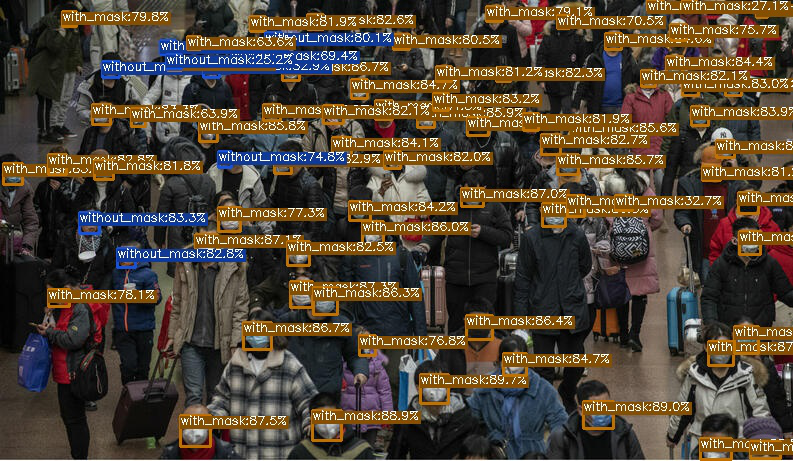

In [ ]:
from PIL import Image
OUTPUT_IMAGE_PATH = "/content/YOLOX/YOLOX_outputs/yolox_voc_s/vis_res/2022_01_24_14_45_08/mascara_2.jpg" 
Image.open(OUTPUT_IMAGE_PATH)

# Salvar modelos no drive para realizar inferências no futuro

In [ ]:
%cp {MODEL_PATH} /content/gdrive/MyDrive/PUC-TCC/projeto/pesos